### Popular Languages

With the below we wanted to find out which are the most used programming languages used by professionals and which to get started with. This should also help in the decision of which Online course one should to sign up for.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
%matplotlib inline

C:\Users\BronyahJ\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('./survey_results_public.csv') #import survey raw data
schema = pd.read_csv('./survey_results_schema.csv') #import schema raw data

In [3]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [5]:
list(schema[schema.Column=='HaveWorkedLanguage']['Question'])

['Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?']

In [6]:
list(schema[schema.Column=='WantWorkLanguage']['Question'])

['Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?']

Both survey questions are similar and to answer question of popular languages we choose the field with least missing data

In [7]:
df['HaveWorkedLanguage'].isnull().mean() # 28% of data missing

0.2873404420921544

In [8]:
df['WantWorkLanguage'].isnull().mean() #34% of data missing

0.34287437733499376

In [101]:
df['HaveWorkedLanguage'].value_counts().reset_index() #multiple entries of languages in some rows. we need to split them

,index,HaveWorkedLanguage
0,C#; JavaScript; SQL,1276
1,JavaScript; PHP; SQL,1143
2,Java,913
3,JavaScript,807
4,JavaScript; PHP,662
...,...,...
8433,Common Lisp; Java; JavaScript,1
8434,C; C#; Java; JavaScript; SQL; VB.NET; VBA,1
8435,C; C#; Common Lisp; Java; JavaScript; PHP,1
8436,C#; F#; Python; R; SQL,1


In [9]:
df_lang = df['HaveWorkedLanguage'].value_counts().reset_index()

In [10]:
def get_possible_values(col_name):
    
    '''
    INPUTS
    
    col_name - name of column in dataframe
    
    OUTPUTS
    
    values_list - String list of all entries in given series
    
    Description
    
    This function splits all values in all rows delimited by a semicolon and returns them as a string
    
    '''
    
    values = [] 
    
    column_split = df[col_name].dropna().apply(lambda x: x.split(';')) #removing missing rows and splitting   
    for row in column_split:
        for val in row:
            values.append(val.strip())
    
    values_list = list(set(values)) #getting only unique values
    
    return values_list

In [11]:
lang_list = get_possible_values('HaveWorkedLanguage') #getting languages into a list

In [85]:
def count_and_plot(df, col1, col2, values, plot=True, asc=False):
    
    '''
    INPUTS
    
    df - dataframe to process
    col1 - column name for data of interest
    col2 - column name for data to be counted
    values - list of all possible values in column of interest 
    plot - boolean whether to plot data
    asc - boolean to sort data asc or desc
    
    OUTPUTS
    
    df_perc - dataframe of computed percentages
    
    '''
    
    df_count = defaultdict(int)
    
    for val in values:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                df_count[val] += int(df[col2][idx])
    
    df_count = pd.DataFrame(pd.Series(df_count)).reset_index()
    df_count.columns = [col1,col2]
    df_count.sort_values(col2, ascending=asc, inplace=True)
    df_count.set_index(col1, inplace=True)
    
    if plot:
        (df_count/df_count.sum()).plot(kind="bar", legend = None);
        plt.title(col2);
    
    df_perc = df_count/df_count.sum()
    
    return df_perc
    

,HaveWorkedLanguage
index,
Java,0.165675
JavaScript,0.134634
C,0.124617
SQL,0.110379
C#,0.073429
Python,0.068886
PHP,0.060563
C++,0.047997
R,0.029728


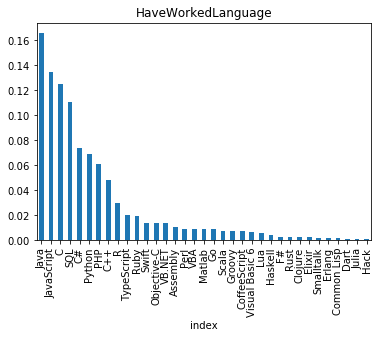

In [13]:
count_and_plot(df_lang,'index','HaveWorkedLanguage',lang_list)

We see Java as the most popular language followed by javascript

In [14]:
# The data seems and we want to see if some languagues are more popular with some developer types than others
list(schema[schema.Column=='DeveloperType']['Question'])

['Which of the following best describe you?']

In [15]:
df['DeveloperType'].isnull().mean() # 70% of data is non-null which should be reliable

0.29706958281444584

In [16]:
df_dev_type = df['DeveloperType'].value_counts().reset_index()

In [17]:
dev_type_list = get_possible_values('DeveloperType')

33% of survey results were from web developers which explains the popularity of Javascript as seen previously

,DeveloperType
index,
Web developer,0.339572
Desktop applications developer,0.135065
Mobile developer,0.107767
Database administrator,0.067203
Developer with a statistics or mathematics background,0.052952
Systems administrator,0.052887
DevOps specialist,0.051968
Embedded applications/devices developer,0.043387
Data scientist,0.039413


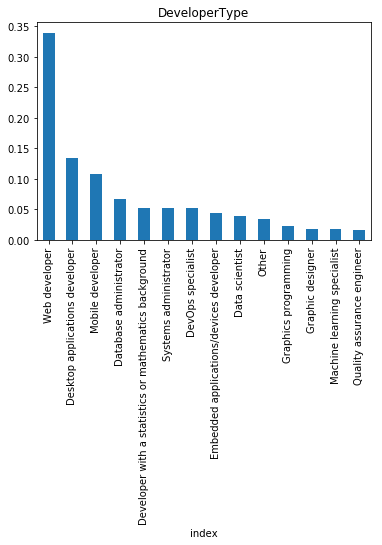

In [18]:
count_and_plot(df_dev_type,'index','DeveloperType',dev_type_list)

In [19]:
def developer_groups(dev_string):
    
    '''
    INPUTS
    
    dev_string - input string to check for substring
    
    Description
    
    This function tries to categorize each entry string based on developer type
    
    '''
    
    if "Web developer" in dev_string and "Desktop applications developer" not in dev_string and "Mobile developer" not in dev_string:
        return 1
    
    elif "Desktop applications developer" in dev_string and "Web developer" not in dev_string and "Mobile developer" not in dev_string:
        return 2
    
    elif "Mobile developer" in dev_string and "Web developer" not in dev_string and "Desktop applications developer" not in dev_string:
        return 3
    
    else:
        return 0

In [20]:
# Categorizing each entry into 4 major developer groups
df['DevGroup'] = df['DeveloperType'].dropna().apply(developer_groups)

In [21]:
other_dev = df[df['DevGroup'] == 0]   # Other type of developers including data scientists and DBA's
web_dev = df[df['DevGroup'] == 1]     # Web developers
desktop_dev = df[df['DevGroup'] == 2] # Desktop application developers
mobile_dev = df[df['DevGroup'] == 3]  # Mobile app developers

In [22]:
# Getting counts for each category

df_dev_type0 = other_dev['HaveWorkedLanguage'].value_counts().reset_index()
df_dev_type1 = web_dev['HaveWorkedLanguage'].value_counts().reset_index()
df_dev_type2 = desktop_dev['HaveWorkedLanguage'].value_counts().reset_index()
df_dev_type3 = mobile_dev['HaveWorkedLanguage'].value_counts().reset_index()

In [86]:
# Getting category totals per developer type

dev_0_perc = count_and_plot(df_dev_type0,'index','HaveWorkedLanguage', lang_list, plot=False, asc=True)
dev_1_perc = count_and_plot(df_dev_type1,'index','HaveWorkedLanguage', lang_list, plot=False, asc=True)
dev_2_perc = count_and_plot(df_dev_type2,'index','HaveWorkedLanguage', lang_list, plot=False, asc=True)
dev_3_perc = count_and_plot(df_dev_type3,'index','HaveWorkedLanguage', lang_list, plot=False, asc=True)

In [89]:
# Resetting index

dev_0_perc.reset_index(inplace=True)
dev_1_perc.reset_index(inplace=True)
dev_2_perc.reset_index(inplace=True)
dev_3_perc.reset_index(inplace=True)

Displaying by developer types we see C is actually the most popular among destop developers and not Java
Also we see Swift and Objective-C as highly popular among Mobile developers

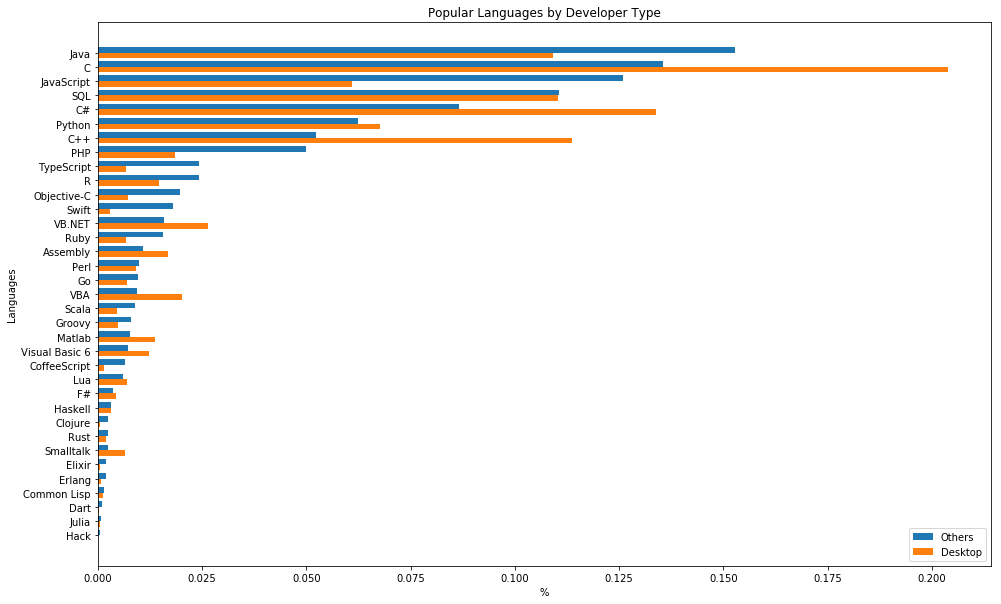

In [98]:
plt.figure(figsize = (16,10))
plt.barh(dev_0_perc['index'],dev_0_perc['HaveWorkedLanguage'],align = 'edge', height = 0.4)
plt.barh(dev_2_perc['index'],dev_2_perc['HaveWorkedLanguage'], align = 'edge', height = -0.4)
plt.xlabel('%')
plt.ylabel('Languages')
plt.legend(['Others','Desktop'],loc=4)
plt.title('Popular Languages by Developer Type')
plt.show()

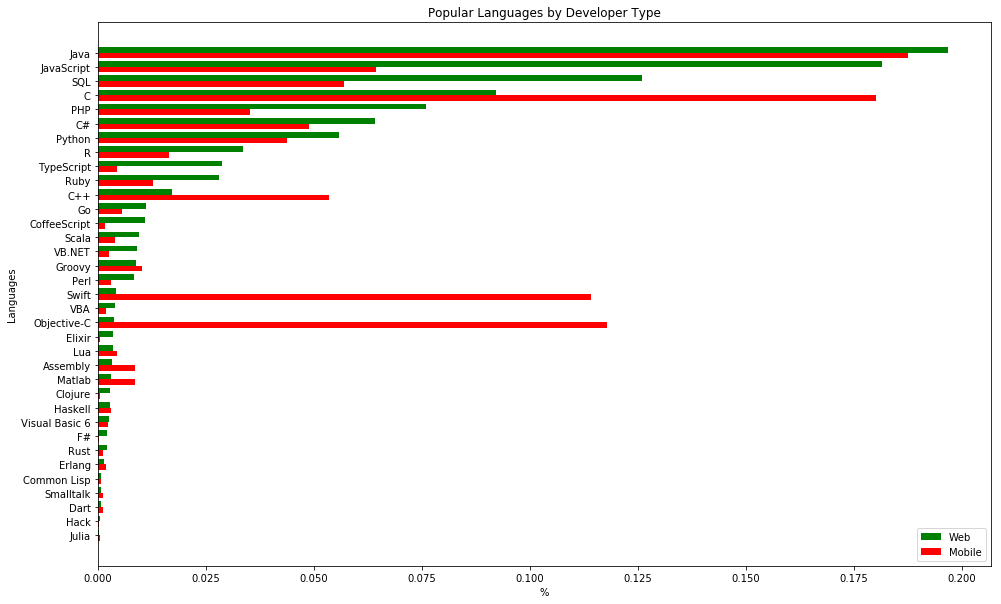

In [99]:
plt.figure(figsize = (16,10))
plt.barh(dev_1_perc['index'],dev_1_perc['HaveWorkedLanguage'],align = 'edge', color='green', height = 0.4)
plt.barh(dev_3_perc['index'],dev_3_perc['HaveWorkedLanguage'], align = 'edge', color='red', height = -0.4)
plt.xlabel('%')
plt.ylabel('Languages')
plt.legend(['Web','Mobile'], loc=4)
plt.title('Popular Languages by Developer Type')
plt.show()